<a href="https://colab.research.google.com/github/nauvalafif/ongkoArab/blob/master/CNN_Arab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model CNN Tensorflow

Cara mempersiapkan data MNIST, membuat network CNN, dan melakukan training dengan tensorflow-keras

## 1. Import library yang dibutuhkan

In [1]:
!pip install keract

import tensorflow as tf
import numpy as np
import h5py
%matplotlib inline 
import matplotlib.pyplot as plt
from matplotlib.image import imread
import math

from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.python.keras.models import Sequential
import tensorflow.python.keras
import tensorflow.contrib.keras as keras
from keras.utils import to_categorical

import pandas as pd
import os

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



Using TensorFlow backend.


In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

## 2. Persiapkan data mnist

In [3]:
#Data Arab Digit
# train -> data untuk training
# test -> data untuk validasi
# x -> gambar input
# y -> label

url_y_train = 'https://raw.githubusercontent.com/nauvalafif/ongkoArab/master/csvTrainLabel%2060k%20x%201.csv'
url_x_test = 'https://raw.githubusercontent.com/nauvalafif/ongkoArab/master/csvTestImages%2010k%20x%20784.csv'
url_y_test = 'https://raw.githubusercontent.com/nauvalafif/ongkoArab/master/csvTestLabel%2010k%20x%201.csv'
id_x_train = '11d5ieoSo00WxCDUU1OggXRyUBbJAs7qb'
downloaded = drive.CreateFile({'id': id_x_train}) 
downloaded.GetContentFile('csvTrainImages 60k x 784.csv')

x_train=pd.read_csv('csvTrainImages 60k x 784.csv')
y_train=pd.read_csv(url_y_train)
x_test=pd.read_csv(url_x_test)
y_test=pd.read_csv(url_y_test)

#img_rows, img_cols = 28, 28
    
#Siapkan matrix training 

x_train=x_train.values.reshape(x_train.shape[0], 28,28,1)
x_test=x_test.values.reshape(x_test.shape[0],28, 28, 1)

# x_train = x_train.reshape(60000, 784)
# x_test = x_test.reshape(10000, 784)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
#x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
#input_shape = (img_rows, img_cols, 1)


# print the final input shape ready for training
print("Train matrix shape", x_train.shape)
print("Test matrix shape", x_test.shape)

# one-hot encoding using keras' numpy-related utilities
# one hot encoding = index neuron dengan nilai paling tinggi menjadi hasil klasifikasi
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", y_train.shape)



Train matrix shape (59999, 28, 28, 1)
Test matrix shape (9999, 28, 28, 1)
Shape before one-hot encoding:  (59999, 1)
Shape after one-hot encoding:  (59999, 10)


## 3. Contoh gambar input

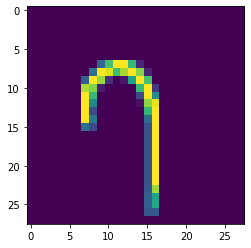

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [9]:
img = x_test[1].reshape(28,28)
plt.imshow(img)
plt.show()

print(y_test[1])

## 4. Deskripsi Model

stride = 0, padding = 0, tidak pakai bias.

Convolution(16 filter, 3x3) -> Convolution(16 filter, 3x3) -> Neural Network(10 neuron) -> Neural Network(10 neuron)

In [10]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), use_bias=False, activation=tf.nn.relu,input_shape=(28,28,1), name='layer_1'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
  tf.keras.layers.Conv2D(16, (3,3), use_bias=False, activation=tf.nn.relu, name='layer_2'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
  tf.keras.layers.Flatten(),
    
  tf.keras.layers.Dense(10, use_bias=False, activation=tf.nn.relu, name='layer_3'),
  tf.keras.layers.Dense(10, use_bias=False, activation=tf.nn.softmax, name='layer_Output'),
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
print(model.summary())



Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_1 (Conv2D)             (None, 26, 26, 16)        144       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
layer_2 (Conv2D)             (None, 11, 11, 16)        2304      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
layer_3 (Dense)              (None, 10)                4000      
_________________________________________

# 5. Training Model

Train on 59999 samples, validate on 9999 samples
Epoch 1/3
59999/59999 [==============================] - 25s 409us/sample - loss: 1.9824 - acc: 0.2920 - val_loss: 1.3961 - val_acc: 0.3801
Epoch 2/3
59999/59999 [==============================] - 25s 411us/sample - loss: 1.1109 - acc: 0.4988 - val_loss: 0.7896 - val_acc: 0.6628
Epoch 3/3
59999/59999 [==============================] - 24s 405us/sample - loss: 0.6469 - acc: 0.7311 - val_loss: 0.6471 - val_acc: 0.7560


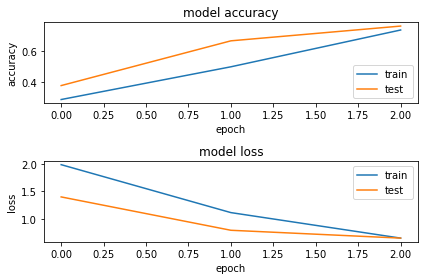

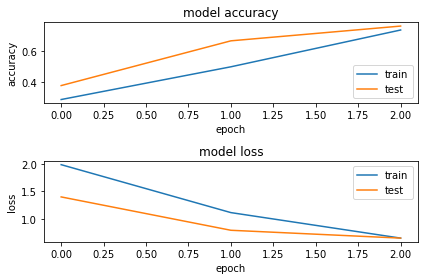

In [11]:
# training the model and saving metrics in history
history = model.fit(x_train, y_train,
          batch_size=128, epochs=3,
          verbose=1,
          validation_data=(x_test, y_test))


# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

## 6. Simpan model ke file .h5

In [12]:
from keras.models import model_from_json   
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("CNN_Model_Arab_Digit.h5")
print("Saved model to disk")

Saved model to disk


In [13]:
from keract import get_activations
activations = get_activations(model, img.reshape(1,28,28,1), "layer_1")

In [0]:
layer1 = np.array(activations['layer_1/Relu:0'])

In [0]:
with h5py.File('CNN_Model_Arab_Digit.h5','r') as hdf:
    layer_1_data = np.array(hdf.get('layer_1/layer_1/kernel:0'))
    layer_2_data = np.array(hdf.get('layer_2/layer_2/kernel:0'))
    layer_3_data = np.array(hdf.get('layer_3/layer_3/kernel:0'))
    layer_out_data = np.array(hdf.get('layer_Output/layer_Output/kernel:0'))
    

In [0]:
weights = np.array(model.get_weights())

In [18]:
weights[2].shape

(400, 10)

In [19]:
layer_3_data.shape

(400, 10)

In [20]:
np.array_equal(weights[3],layer_out_data)

True